# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data From Train File

In [2]:
train = pd.read_csv('train.txt', sep=' ', header = None)
class1 = train[train.iloc[:,2]==1]
# print(class1)
class2 = train[train.iloc[:,2]==2]
# print(class2)
X1 = class1.iloc[:,0:2].values
# print(X1)
X2 = class2.iloc[:,0:2].values
# print(X2)

# Reading Data From Test File

In [3]:
test = pd.read_csv('test.txt', sep=' ', header = None)
X_val = test.iloc[:,0:2].values
Y_val = test.iloc[:,2].values
# print(X_val,Y_val)

# Calculating g(X)

In [4]:
mean1 = np.mean(X1,axis=0)
mean2 = np.mean(X2,axis=0)
# print(mean1,mean2)
mean1 = mean1.reshape(2,1)
mean2 = mean2.reshape(2,1)
# print(mean1,mean2)

gx1,gx2 = ([],[])
for i in range(len(X_val)):
    gx1.append(np.matmul(np.transpose(X_val[i]),mean1) - (np.matmul(np.transpose(mean1), mean1))/2)
    gx2.append(np.matmul(np.transpose(X_val[i]),mean2) - (np.matmul(np.transpose(mean2), mean2))/2) 
# print(gx1,gx2)

# Predicting Class

In [5]:
list1, list2, list3 = ([],[],[])

for i in range(len(X_val)):
    if(gx1[i]>gx2[i]):
        list1.append(X_val[i])
        list3.append(1)
    else:
        list2.append(X_val[i])
        list3.append(2)
# print(list1,list2,list3)
XL1 = np.array(list1)
XL2 = np.array(list2)
preds = np.array(list3)
# print(XL1,XL2,preds)

# Calculating Decision Boundary

In [6]:
x , y= ([],[])
constant = (np.matmul(np.transpose(mean1),mean1) - np.matmul(np.transpose(mean2),mean2))/2
# print(constant)

for i in range(-4,8):
    x.append(i)
    y.append((-(i*(mean1[0]- mean2[0]) - constant)/(mean1[1]- mean2[1])).item())
    
# print(x,y)

# Plotting Points and Decision Boundary

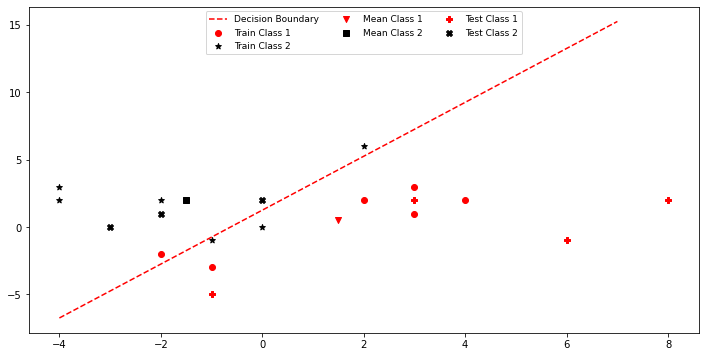

In [7]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(X1[:,0],X1[:,1], color='red', marker= 'o' , label ='Train Class 1')
plt.scatter(X2[:,0],X2[:,1], color='black', marker= '*' , label ='Train Class 2')
plt.scatter(mean1[0],mean1[1], color='red', marker= 'v' , label ='Mean Class 1')
plt.scatter(mean2[0],mean2[1], color='black', marker= 's' , label ='Mean Class 2')
plt.scatter(XL1[:,0],XL1[:,1], color='red', marker= 'P' , label ='Test Class 1')
plt.scatter(XL2[:,0],XL2[:,1], color='black', marker= 'X' , label ='Test Class 2')
plt.plot(np.array(x),np.array(y), color = 'red', linestyle='--',label = 'Decision Boundary')
plt.legend(loc ='upper center',ncol=3,fontsize =9)
plt.show()

# Accuracy Calculation

In [8]:
cnt = 0
for i in range(len(X_val)):
    if Y_val[i] == preds[i]:
        cnt +=1
print('Accracy = ',cnt/len(X_val))

Accracy =  0.8571428571428571
